In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

### US Airports

In [2]:
# load data
data = open('a.csv', mode='r')
next(data, None)
us_graph = nx.parse_edgelist(data,
                         delimiter=",",
                         create_using=nx.Graph(),
                         nodetype=int)

TypeError: Failed to convert edge data (['1']) to dictionary.

In [3]:
# create starting percolation dictionary
us_perc_dict = {}
for i in list(nx.nodes(us_graph)):
    us_perc_dict[i] = 0.0000001
us_perc_dict[1] = 1

In [4]:
# create empty infected nodes list for graphs
us_infected_nodes_list = []

In [5]:
# create us betweenness
us_betweenness = nx.betweenness_centrality(us_graph)
us_betweenness_sum = sum(list(us_betweenness.values()))

In [6]:
# create us perc / betweenness ratio
us_perc_bet_ratio_list = []

In [7]:
# calculate perc centrality for t number of time steps
for t in range(1,21):
    us_perc_centrality_dict = nx.percolation_centrality(us_graph, 
                                                        attribute='percolation', 
                                                        states=us_perc_dict,
                                                        weight=None)
    
    # set percolation threshold for change in colour
    us_perc_threshold = [k for k,v in us_perc_dict.items() if float(v) == 1.0]
    # save graph
    
    plt.figure(figsize=[20, 20])
    plt.title("Timestep: "+ str(t))
    nx.draw_networkx(us_graph,
            pos=nx.spring_layout(us_graph,k=0.6,iterations=40),
            width=0.2,
            node_size=[(6000*i)+100 for i in list(us_perc_centrality_dict.values())],
            font_size=10,
            node_color=['gray' if not node in us_perc_threshold else 'red' for node in us_graph.nodes()])
    plt.axis('off')
    plt.savefig('us'+str(t)+'.png')
    
    
    nodes_to_find_neighbours = []
    nodes_to_update = []
    for node, perc_state in us_perc_dict.items():
        if perc_state == 1:
            nodes_to_find_neighbours.append(node)
    #print("infected nodes: " + str(nodes_to_find_neighbours) + " time: " + str(t))
        
    for i in nodes_to_find_neighbours:
        for node in [n for n in us_graph.neighbors(i)]:
            nodes_to_update.append(node)
    for x in nodes_to_find_neighbours:
        if x in nodes_to_update:
            nodes_to_update.remove(x)
    #print("nodes that came in contact with infected nodes: " + str(nodes_to_update) + " time: " + str(t))

    for n in nodes_to_update:
        random_num = np.random.uniform(0.0, 1.0)
        if random_num < 0.2:
            us_perc_dict[n] = 1
            
    us_infected_nodes_list.append(len(nodes_to_find_neighbours))
    
    us_perc_cent_sum = sum(list(us_perc_centrality_dict.values()))
    
    us_perc_bet_ratio = us_perc_cent_sum / us_betweenness_sum 
    
    us_perc_bet_ratio_list.append(us_perc_bet_ratio)

NetworkXError: The node 1 is not in the graph.

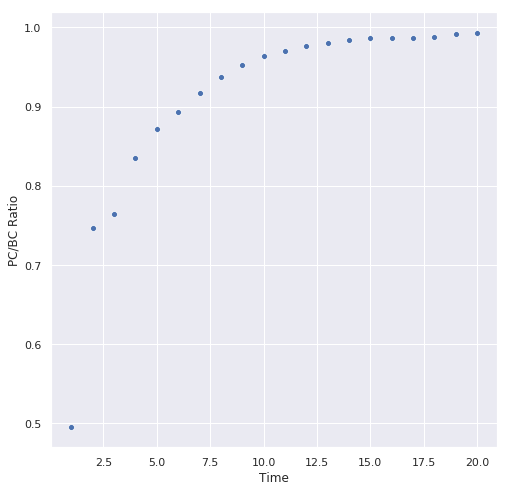

In [158]:
# Plot perc ratio over time
time_step = list(range(1,len(us_perc_bet_ratio_list)+1))
plt.figure(figsize=[8, 8])
ax = sns.scatterplot(x=time_step, y=us_perc_bet_ratio_list)
plt.ylabel("PC/BC Ratio")
plt.xlabel("Time")
plt.savefig('us_perc_ratio.png')

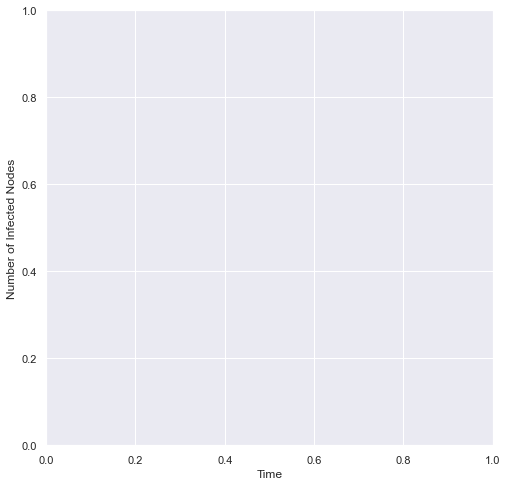

In [8]:
# Plot infected nodes over time
time_step = list(range(1,len(us_infected_nodes_list)+1))
plt.figure(figsize=[8, 8])
ax = sns.scatterplot(x=time_step, y=us_infected_nodes_list)
plt.ylabel("Number of Infected Nodes")
plt.xlabel("Time")
plt.savefig('us_infected.png')

## Barcelona

In [9]:
# load data
data = open('barcelona.csv', mode='r')
next(data, None)
# create graph
barc_graph = nx.parse_edgelist(data,
                           delimiter=",",
                           create_using=nx.DiGraph(),
                           nodetype=int)

In [10]:
# create percolation state dictionary
barc_perc_dict = {}
for i in list(nx.nodes(barc_graph)):
    barc_perc_dict[i] = 0.0000001
barc_perc_dict[10] = 1

In [11]:
# create empty infected nodes list for graphs
barc_infected_nodes_list = []

In [12]:
# create barc betweenness
barc_betweenness = nx.betweenness_centrality(barc_graph)
barc_betweenness_sum = sum(list(barc_betweenness.values()))

In [13]:
# create barc perc / betweenness ratio
barc_perc_bet_ratio_list = []

#create a list of immunized nodes which cannot be infected based on their percolation centralities
nodes_immunized_pc = []

#create a list of immunized nodes which cannot be infected based on their betweenness centralities
nodes_immunized_bc = []

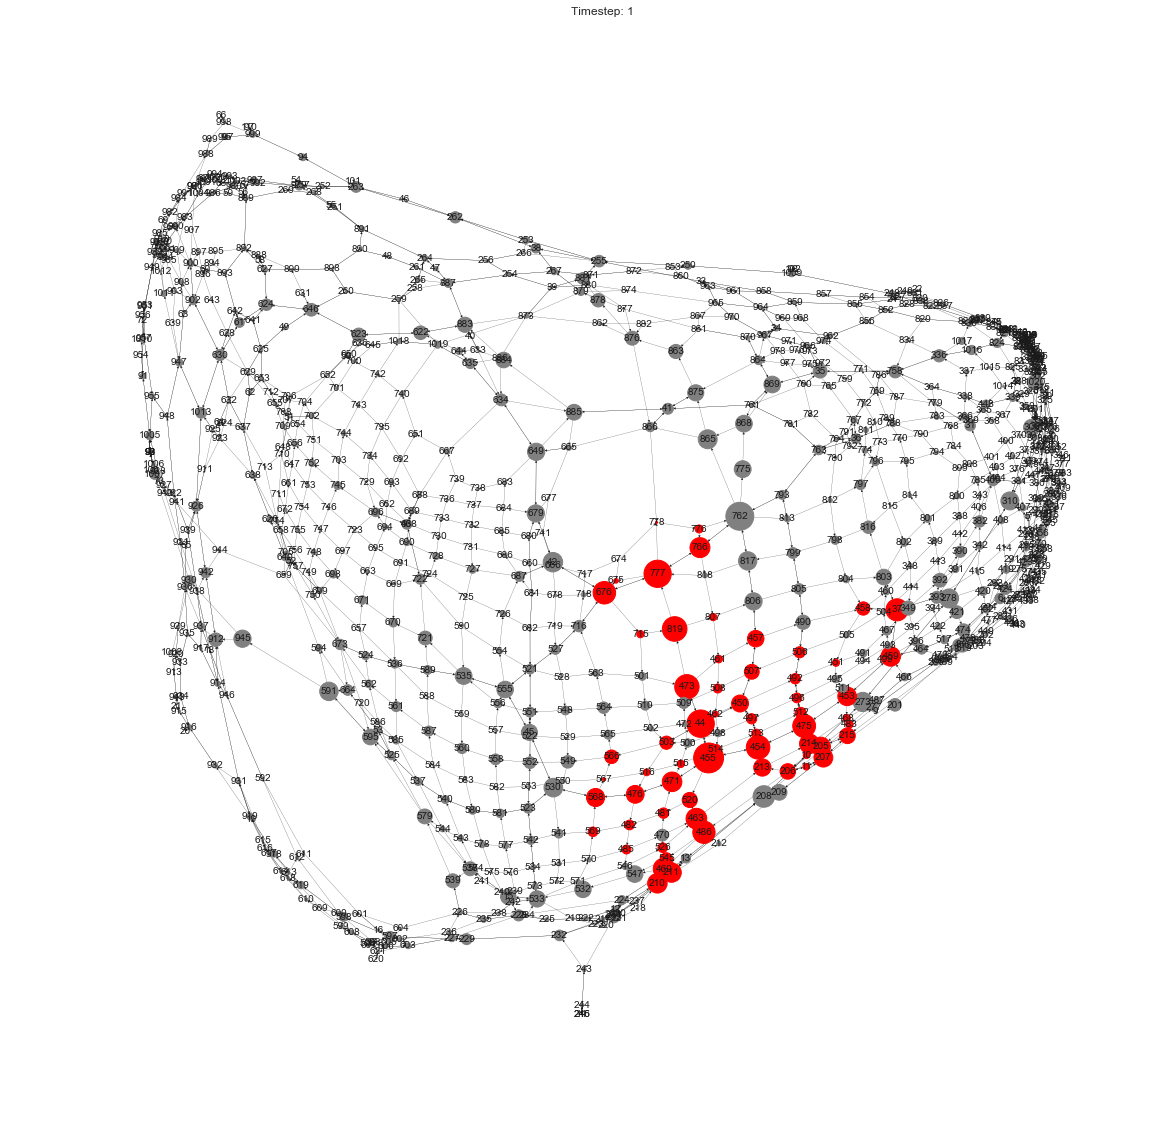

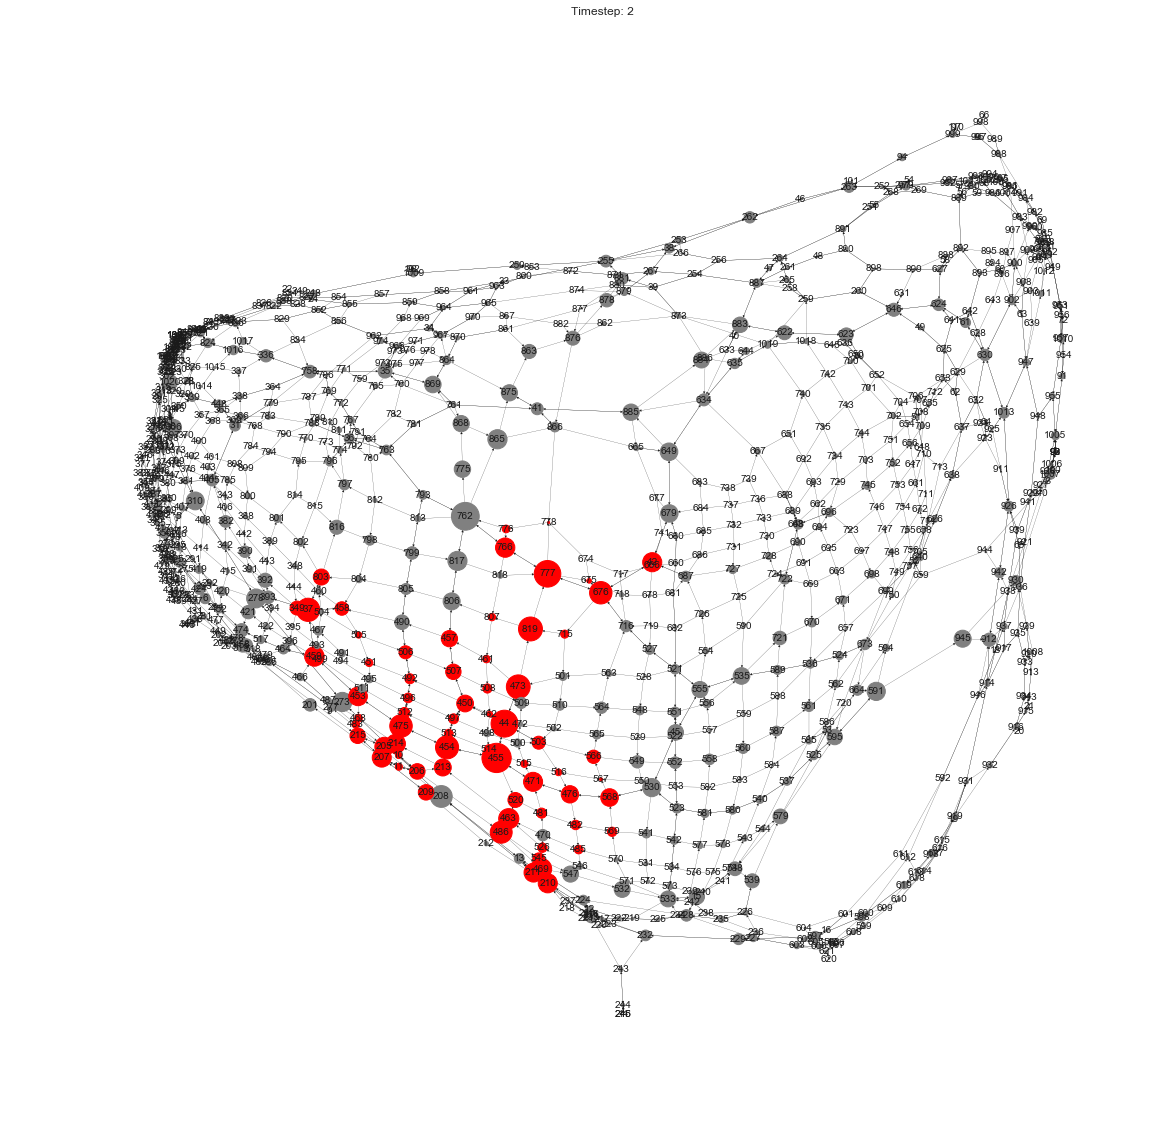

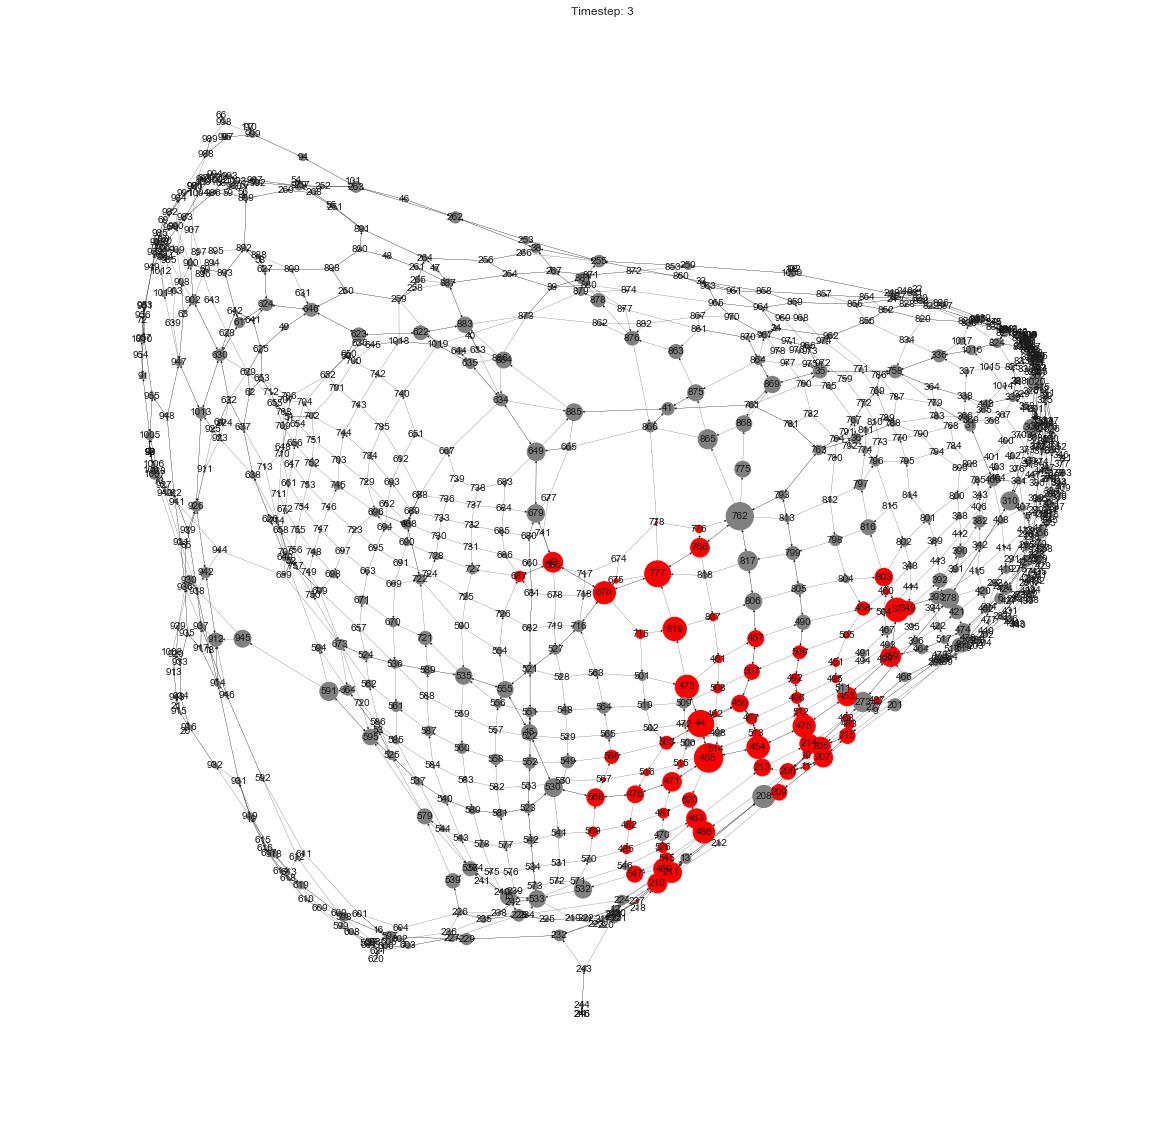

In [ ]:
# calculate perc centrality for t number of time steps
for t in range(1,21):
    barc_perc_centrality_dict = nx.percolation_centrality(barc_graph, 
                                                      attribute='percolation', 
                                                      states=barc_perc_dict,
                                                      weight=None)
    
    if t == 6:
        nodes_immunized_pc = sorted(barc_perc_centrality_dict, key=barc_perc_centrality_dict.get, reverse=True)[:10]
        #nodes_immunized_bc = sorted(barc_betweenness, key=barc_betweenness.get, reverse=True)[:10]
    for n in nodes_immunized_pc:
        if barc_perc_dict[n] == 1:
            barc_perc_dict[n] == 0.0000001
    
    # set percolation threshold for change in colour
    barc_perc_threshold = [k for k,v in barc_perc_dict.items() if float(v) == 1.0]
    # save graph
    plt.figure(figsize=[20, 20])
    plt.title("Timestep: "+ str(t))
    nx.draw_networkx(barc_graph,
            pos=nx.spectral_layout(barc_graph),
            arrowsize=5,
            width=0.2,
            node_size=[4000*i for i in list(barc_perc_centrality_dict.values())],
            font_size=10,
            node_color=['gray' if not node in barc_perc_threshold else 'red' for node in barc_graph.nodes()])
    plt.axis('off')
    plt.savefig('barc'+str(t)+'.png')
    
    nodes_to_find_neighbours = []
    nodes_to_update = []
    
    
    """
    for n in nodes_immunized_bc:
        if barc_perc_dict[n] == 1:
            barc_perc_dict[n] == 0.0000001
    """ 
    
    
    for node, perc_state in barc_perc_dict.items():
        if perc_state == 1:
            nodes_to_find_neighbours.append(node)
    #print("infected nodes: " + str(nodes_to_find_neighbours) + " time: " + str(t))
        
    for i in nodes_to_find_neighbours:
        for node in [n for n in barc_graph.neighbors(i)]:
            nodes_to_update.append(node)
    for x in nodes_to_find_neighbours:
        if x in nodes_to_update:
            nodes_to_update.remove(x)
    #print("nodes that came in contact with infected nodes: " + str(nodes_to_update) + " time: " + str(t))

    for n in nodes_to_update:
        random_num = np.random.uniform(0.0, 1.0)
        if random_num < 0.2:
            barc_perc_dict[n] = 1
     
        
    barc_infected_nodes_list.append(len(nodes_to_find_neighbours))
    
    barc_perc_cent_sum = sum(list(barc_perc_centrality_dict.values()))
    
    barc_perc_bet_ratio = barc_perc_cent_sum / barc_betweenness_sum 
    
    barc_perc_bet_ratio_list.append(barc_perc_bet_ratio)

In [ ]:
nodes_immunized

In [ ]:
# Plot perc ratio over time
time_step = list(range(1,len(barc_perc_bet_ratio_list)+1))
plt.figure(figsize=[8, 8])
ax = sns.scatterplot(x=time_step, y=barc_perc_bet_ratio_list)
plt.ylabel("PC/BC Ratio")
plt.xlabel("Time")
plt.savefig('barc_perc_ratio.png')

In [ ]:
# Plot infected nodes over time
time_step = list(range(1,len(barc_infected_nodes_list)+1))
plt.figure(figsize=[8, 8])
ax = sns.scatterplot(x=time_step, y=barc_infected_nodes_list)
plt.ylabel("Number of Infected Nodes")
plt.xlabel("Time")
plt.savefig('barc_infected.png')